# Paleomagnetic Sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite as smp

%matplotlib inline

In [89]:
%%time

angular_dispersio_within_site = 10 # degrees
kappa_within_site = smp.angular2kappa(angular_dispersio_within_site)
latitude = 30
outlier_rate = 0.40
n_iters = 5000

params1 = smp.Params(n=40,
                     k=1,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

params2 = smp.Params(n=8,
                     k=5,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

df1 = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers=False)
df2 = smp.simulate_estimations(params2, n_iters=n_iters, ignore_outliers=True)

df1.to_csv("../../outputs/fig3b_df1.csv")
df2.to_csv("../../outputs/fig3b_df2.csv")

CPU times: user 10min 14s, sys: 63.4 ms, total: 10min 14s
Wall time: 10min 14s


### Figure 3a

In [3]:
df1 = pd.read_csv("../../outputs/fig3a_df1.csv")
df2 = pd.read_csv("../../outputs/fig3a_df2.csv")

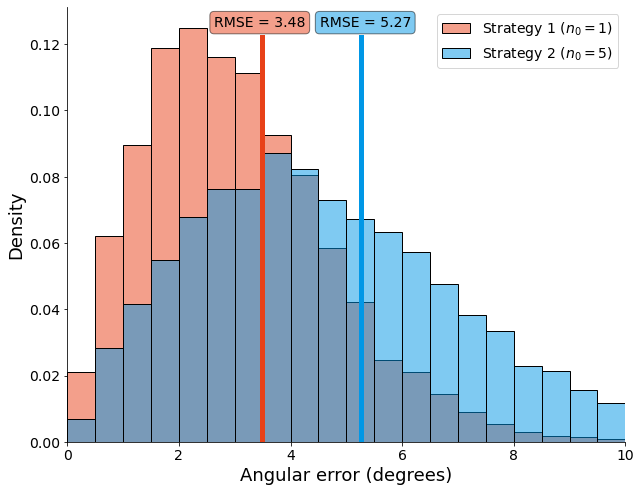

In [5]:
%matplotlib inline

x_max = 10

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.histplot(df1.error_angle, ax=axes, color='#e84118', stat='probability', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 1 ($n_0=1$)")
sns.histplot(df2.error_angle, ax=axes, color='#0097e6', stat='probability', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 2 ($n_0=5$)")

rmse1 = np.round(np.mean(df1.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df2.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

# textstr = '\n'.join((
# r'$Error Method 1=%.2f$' % (rmse1, ),
# r'$RMSE Method 2=%.2f$' % (rmse2, )))

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.085, 0.98, "RMSE = {}".format(rmse1), transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.075, 0.98, "RMSE = {}".format(rmse2), transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3a.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3a.png", format="png", bbox_inches='tight')

## Fig 3b

In [6]:
df1 = pd.read_csv("../../outputs/fig3b_df1.csv")
df2 = pd.read_csv("../../outputs/fig3b_df2.csv")

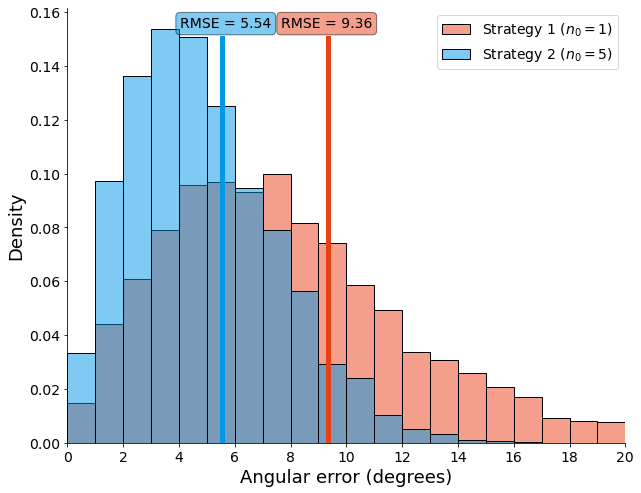

In [7]:
%matplotlib inline

x_max = 20

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.histplot(df1.error_angle, ax=axes, color='#e84118', stat='probability', binwidth=1, binrange=(0,20), alpha=.5, label="Strategy 1 ($n_0=1$)")
sns.histplot(df2.error_angle, ax=axes, color='#0097e6', stat='probability', binwidth=1, binrange=(0,20), alpha=.5, label="Strategy 2 ($n_0=5$)")

rmse1 = np.round(np.mean(df1.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df2.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

# textstr = '\n'.join((
# r'$Error Method 1=%.2f$' % (rmse1, ),
# r'$RMSE Method 2=%.2f$' % (rmse2, )))

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.085, 0.98, "RMSE = {}".format(rmse1), transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.075, 0.98, "RMSE = {}".format(rmse2), transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3b.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3b.png", format="png", bbox_inches='tight')